In [1]:
import numpy as np
import cvxpy as cvx
import scipy as sp

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [5]:
mu = np.array([0,0])
sig1 = 1
sig2 = 4
cor = 0.7
n=500
cov = np.array([[sig1**2,cor*sig1*sig2],[cor*sig1*sig2,sig2**2]])
X = np.random.multivariate_normal(mu,cov,n);
r = 3*X[:,0]-X[:,1];
r = r-r.mean();

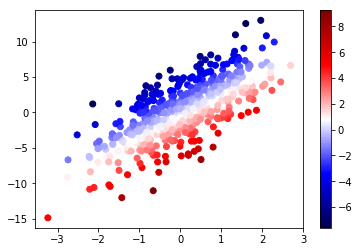

In [6]:
scat = plt.scatter(X[:,0],X[:,1],c=r,cmap='seismic');
plt.colorbar(scat);

In [7]:
q1 = cvx.Variable(2)
b1 = cvx.Variable()
lamb = cvx.Parameter(sign='positive')
loss = lambda r: cvx.exp(-5*r)
obj = 1/n*cvx.sum_entries(loss(cvx.mul_elemwise(r,X*q1+b1))) + lamb*(b1**2+cvx.norm(q1)**2)
prob1 = cvx.Problem(cvx.Minimize(obj))
lamb.value = 1
prob1.solve()
q1 = q1.value.A1
b1 = b1.value

In [8]:
q1,b1

(array([ 0.25904862, -0.10004242]), 0.0081150565453820545)

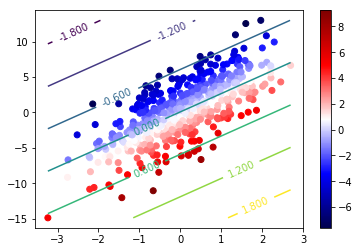

In [9]:
scat = plt.scatter(X[:,0],X[:,1],c=r,cmap='seismic');
plt.colorbar(scat);
delta = 50
xx0 = np.linspace(min(X[:,0]),max(X[:,0]),delta)
xx1 = np.linspace(min(X[:,1]),max(X[:,1]),delta)
X_s = np.array(np.meshgrid(xx0,xx1)).T.reshape((delta*delta,2))
Z = (b1+np.inner(X_s,q1)).reshape((delta,delta)).T
cont = plt.contour(xx0,xx1,Z)
plt.clabel(cont);

In [10]:
q2 = cvx.Variable(2)
b2 = cvx.Variable()
lamb = cvx.Parameter(sign='positive')
loss = lambda r: cvx.exp(-5*r)
obj = cvx.sum_entries(loss(cvx.mul_elemwise(r,X*q2+b2))) + lamb*(b2**2+cvx.norm(X*q2)**2)
prob2 = cvx.Problem(cvx.Minimize(obj))
lamb.value = 0.001
prob2.solve()
q2 = q2.value.A1
b2 = b2.value

In [11]:
q2,b2

(array([ 5.10274458, -1.65834639]), 0.18937582922309457)

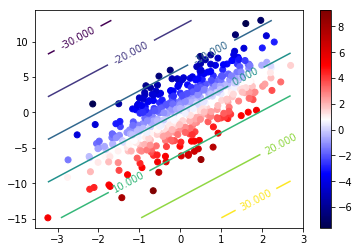

In [12]:
scat = plt.scatter(X[:,0],X[:,1],c=r,cmap='seismic');
plt.colorbar(scat);
delta = 50
xx0 = np.linspace(min(X[:,0]),max(X[:,0]),delta)
xx1 = np.linspace(min(X[:,1]),max(X[:,1]),delta)
X_s = np.array(np.meshgrid(xx0,xx1)).T.reshape((delta*delta,2))
Z = (b2+np.inner(X_s,q2)).reshape((delta,delta)).T
cont = plt.contour(xx0,xx1,Z)
plt.clabel(cont);

In [13]:
inv = np.linalg.inv(cov)

In [14]:
y = np.random.multivariate_normal([0,0],[[1,0],[0,1]],1000)

In [15]:
cov

array([[  1. ,   2.8],
       [  2.8,  16. ]])

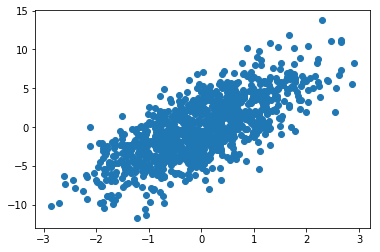

In [16]:
plt.scatter(*sp.linalg.sqrtm(cov)@(y.T))

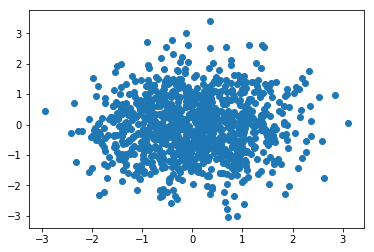

In [17]:
plt.scatter(*y.T)

In [35]:
np.linalg.eig(inv)

(array([ 2.02274792,  0.06058541]), array([[ 0.98408371,  0.17770549],
        [-0.17770549,  0.98408371]]))

In [38]:
np.linalg.eig(-np.inner(X.T,X.T)/n)

(array([ -0.47604982, -16.88219977]), array([[ 0.98302341,  0.18348018],
        [-0.18348018,  0.98302341]]))